In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

featuer_name_df = pd.read_csv(url, sep='\s+', 
                               # \s+ : 한개 이상의 띄어쓰기로 구분되어져 있다
                               header = None,
                               # header = : 인덱스를 이용하여 header 설정, none 시 없음
                               names = ['column_index', 'column_name'])
                               # name =[] : 불러올 때 칼럼 이름을 지정한 이름으로 변경
featuer_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [67]:
len(featuer_name_df)

561

In [68]:
featuer_name = featuer_name_df.iloc[:, 1].values.tolist()
                                           # values : 값들만 추출
                                           # tolist() : 리스트로 변환
featuer_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [69]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header = None)
X_test = pd.read_csv(X_test_url, sep='\s+', header = None)

In [70]:
X_train.columns = featuer_name
X_test.columns = featuer_name
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [71]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header = None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header = None, names=['action'])

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# shape : 머신러닝의 행, 열을 표현

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [73]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

### DecisionTree

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=4, random_state=13)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.8096369189005769

### GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24]}
grid_cv = GridSearchCV(estimator=dt_clf, 
                       param_grid=params, 
                       scoring='accuracy', # scoring = : 예측 성능을 측정할 평가 방법 설정
                       cv = 5, 
                       return_train_score=True) # return_train_score = False면 cv_results_가 training score 값을 갖고 있지 않음
                        # 여기선 True를 주면서 cv_results_에 training score 포함 됨
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

### best_score
- X_test, y_test가 아닌 X_train, y_train 을 5개(cv=5)로 나누어 교차 검증한 값 중 가장 높은 값 산출

In [88]:
grid_cv.best_score_

0.8543335321892183

### best_params
- X_test, y_test가 아닌 X_train, y_train 을 5개(cv=5)로 나누어 교차 검증한 파라미터 중 가장 좋은 파라미터

In [89]:
grid_cv.best_params_

{'max_depth': 8}

In [90]:
grid_cv.cv_results_

{'mean_fit_time': array([3.35745883, 5.15435033, 6.20360646, 5.48495936, 6.17894287,
        6.39430509, 6.49144392]),
 'std_fit_time': array([0.14505093, 0.21415043, 0.82497557, 0.3180133 , 0.41388346,
        0.5408986 , 0.57312427]),
 'mean_score_time': array([0.00721855, 0.0079711 , 0.0087256 , 0.00761085, 0.00706301,
        0.00676394, 0.00652337]),
 'std_score_time': array([0.00035631, 0.00053693, 0.00263151, 0.00141853, 0.00072919,
        0.00066805, 0.0004241 ]),
 'param_max_depth': masked_array(data=[6, 8, 10, 12, 16, 20, 24],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 16},
  {'max_depth': 20},
  {'max_depth': 24}],
 'split0_test_score': array([0.81509177, 0.82324949, 0.81781101, 0.79401768, 0.79469748,
        0.8028552 , 0.80013596]),
 'split1_test_score': array([0.86811693, 0.82528892, 0.

### max_depth 별로 표로 성능 정리
- test와 teain의 차이가 보인다 -> train의 값이 높다 -> 과적합 의심

In [91]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [92]:
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]
# param_max_depth : 검증 시 설정한 max_depth

# mean_test_score : param_max_depth 설정 후 cv= 의 갯수에 따른 validation set에서 구한 score를 평균한 것 
# ex)cv=5 일때 5개 validation set에서 구한 score를 평균한 것

# mean_train_score : param_max_depth 설정 후 cv= 의 갯수에 따른 train set에서 구한 score를 평균한 것, 
# ex)  cv=5 일때 5개 train set에서 구한 score를 평균한 것

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


### DecisionTree 실제 test 데이터에서의 결과
- 가장 좋은 환경 : max_depth = 8 accuracy = 0.8707159823549372 

In [97]:
best_dt_clf = grid_cv.best_estimator_
pred_ex = best_dt_clf.predict(X_test)

accuracy_score(y_test, pred_ex)


0.8734306073973532

In [94]:
max_depth = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)

    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)

    print('max_depth =', depth, 'accuracy =', accuracy)

max_depth = 6 accuracy = 0.8557855446216491
max_depth = 8 accuracy = 0.8707159823549372
max_depth = 10 accuracy = 0.8673227010519172
max_depth = 12 accuracy = 0.8646080760095012
max_depth = 16 accuracy = 0.8574821852731591
max_depth = 20 accuracy = 0.8547675602307431
max_depth = 24 accuracy = 0.8547675602307431


### RandomForest 적용
- max_depth : DecisionTree의 가지의 수
- n_estimators : 사용한 DecisionTree 수
- min_samples_leaf : max_depth가 한계치에 오지 않았지만 분할해서 leaf가 될 수 있는 최소 샘플수를 지정하는 것
- min_samples_split : leaf에서 가지로 분할 할 수 있는 샘플수를 지정하는 것

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6, 8, 10],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
# n_jobs : 학습 시 사용할 CPU의 코어 개수, -1은 CPU의 코어 전부 사용
grid_cv = GridSearchCV(estimator=rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [99]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

### 표로 확인

In [100]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score', ascending=True).head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


### best 모델 확인

In [101]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [102]:
grid_cv.best_score_

0.9151251360174102

### test 데이터 적용

In [103]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9205972175093315

### 중요 특성 확인

In [104]:
rf_clf_best.feature_importances_

array([9.63570543e-05, 2.16715797e-04, 5.81975113e-05, 7.84266934e-03,
       2.51857403e-04, 3.07774386e-04, 4.79591810e-03, 4.09964695e-04,
       2.64005967e-04, 1.19698243e-02, 3.94764000e-05, 2.67806154e-04,
       2.07328000e-04, 9.88123061e-05, 1.40002321e-04, 9.16704113e-04,
       2.73999937e-03, 2.82976871e-04, 7.27134961e-04, 1.76970389e-03,
       3.45707764e-04, 1.36433644e-04, 1.23752152e-03, 1.57683401e-04,
       1.08862142e-04, 3.21316110e-04, 4.56947758e-05, 4.78143898e-05,
       7.90350892e-05, 5.10934027e-05, 5.07171302e-05, 7.02169848e-05,
       4.43780078e-05, 1.66771180e-04, 2.66769490e-05, 9.75250912e-06,
       1.04785140e-04, 4.25392011e-03, 7.78965780e-04, 5.38515789e-03,
       2.95128998e-02, 2.60520310e-02, 1.56883317e-02, 1.60383984e-03,
       6.74589552e-04, 5.46801242e-04, 1.67349902e-03, 5.74077616e-04,
       2.40162269e-04, 2.76616100e-02, 3.25178134e-02, 3.96718070e-03,
       2.77748342e-02, 2.30372983e-02, 8.84155484e-03, 4.06675092e-03,
      

### 각 특성들의 중요도 확인 및 시각화
- 각 특성들의 중요도가 개별적으로 높지 않다
- .feature_importances_ : 모델을 결정하기 위한 중요 feature가 어떻게 나왔는지 각각의 중요도를 보여주는 메써드

In [105]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(data = best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

angle(X,gravityMean)               0.034638
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026553
tGravityAcc-mean()-Y               0.026052
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012837
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011257
fBodyAccJerk-max()-X               0.011040
dtype: float64

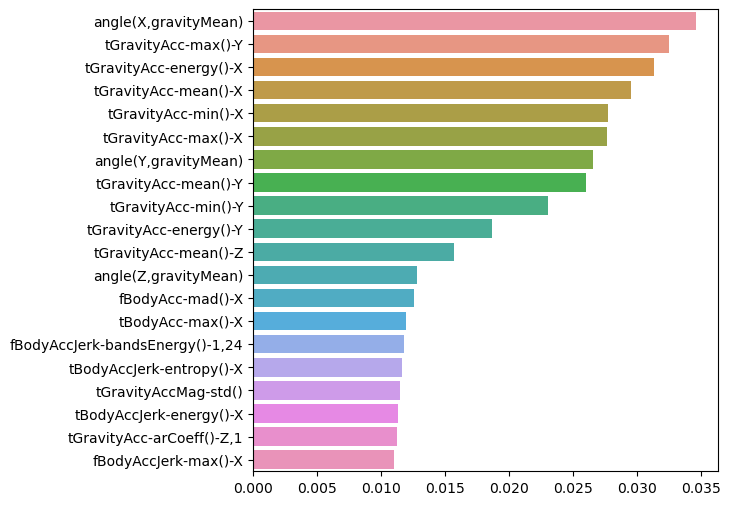

In [106]:
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.barplot(x = top20_cols, y = top20_cols.index)
plt.show()

### 주요 20개 특성을 통한 성능 재확인

In [107]:
top20_cols.index

Index(['angle(X,gravityMean)', 'tGravityAcc-max()-Y', 'tGravityAcc-energy()-X',
       'tGravityAcc-mean()-X', 'tGravityAcc-min()-X', 'tGravityAcc-max()-X',
       'angle(Y,gravityMean)', 'tGravityAcc-mean()-Y', 'tGravityAcc-min()-Y',
       'tGravityAcc-energy()-Y', 'tGravityAcc-mean()-Z',
       'angle(Z,gravityMean)', 'fBodyAcc-mad()-X', 'tBodyAcc-max()-X',
       'fBodyAccJerk-bandsEnergy()-1,24', 'tBodyAccJerk-entropy()-X',
       'tGravityAccMag-std()', 'tBodyAccJerk-energy()-X',
       'tGravityAcc-arCoeff()-Z,1', 'fBodyAccJerk-max()-X'],
      dtype='object')

In [108]:
y_train.values

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [109]:
y_train.values.reshape(-1,)

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [110]:
X_train_re = X_train[top20_cols.index]
# X_train 중에서 top20_cols 인덱스로 있는 컬럼들을 가져오겠다
X_test_re = X_test[top20_cols.index]
# X_test 중에서 top20_cols 인덱스로 있는 컬럼들을 가져오겠다

rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train.values.reshape(-1,))

pred1_re = rf_clf_best_re.predict(X_test_re)

accuracy_score(y_test, pred1_re)


0.8177807940278249